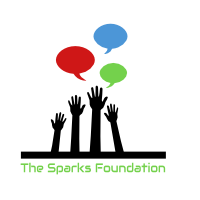


● Perform **Exploratory Data Analysis** on `Indian Premier League` dataset.

● As a **Sports Analysts**, Find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

## Data Preprocessing

In [36]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
match_data = pd.read_csv("matches.csv")
delivery_data = pd.read_csv("deliveries.csv")

In [38]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [39]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### using these columns for Analysis

In [40]:
match_data = match_data[['season','team1', 'team2','toss_winner','toss_decision','winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match' , 'venue']]
match_data.head()

,season,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


### check correlation

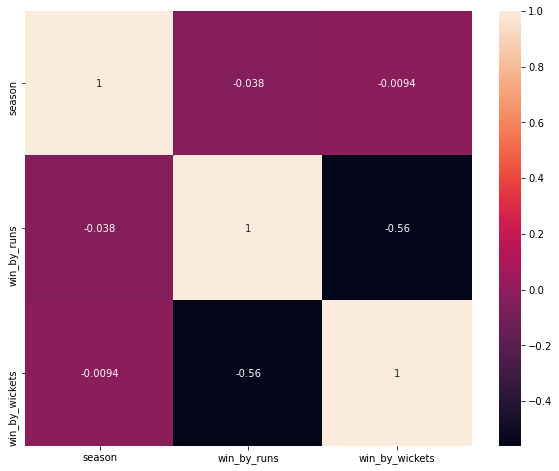

In [41]:
plt.figure(figsize = (10,8))
sns.heatmap(match_data.corr() , annot=True )
plt.show()

* There is no correlation btw any columns.

### checking null values

In [42]:
match_data.isnull().sum()

season             0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [43]:
match_data.dropna(inplace=True)

In [44]:
match_data.isnull().sum()

season             0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

### removing duplicate rows from data

In [45]:
match_data.drop_duplicates(keep = 'first' , inplace=True)

# Exploratory Data Analysis

### Most Successful Team of Each Season.

In [46]:
pd.options.display.max_rows = None
top_season_team = match_data.groupby('season')['winner'].value_counts()
top_season_team

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

## Champions Each Season.

In [47]:
champ_season = match_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].sort_values('season').reset_index(drop = True)
champ_season

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [48]:
# pd.crosstab(match_data.season , match_data.winner)

### Most successful team of all seasons.

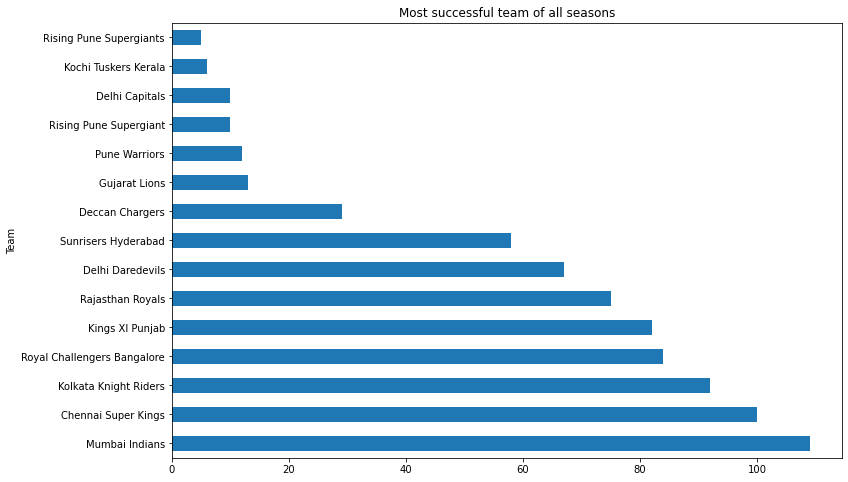

In [49]:

match_data['winner'].value_counts().plot.barh(figsize=(12,8),title = 'Most successful team of all seasons' , xlabel = 'Team' )
plt.show()

* **Mumbai Indians** , **Chennai Super Kings** , **Kolkata Knight Riders** are the most successfull teams of IPL

### total matches in each season

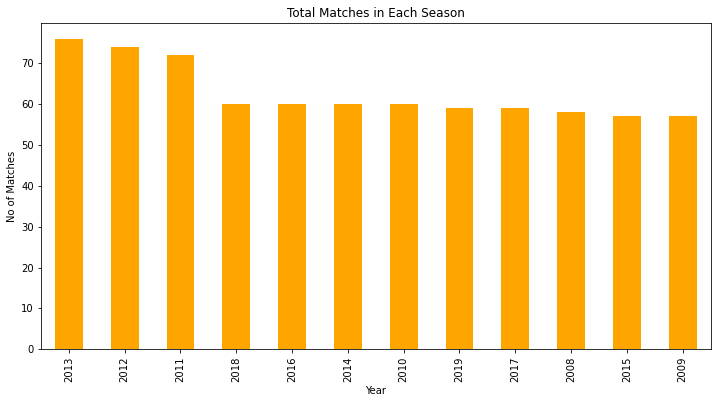

In [50]:
total_match_season = match_data['season'].value_counts().plot.bar(figsize=(12,6) , title = 'Total Matches in Each Season' , xlabel = 'Year' , ylabel = 'No of Matches' , color = 'orange')

In `2013`, we have the most number of matches comapre to other ipl sason

### Number of matches in each venue:

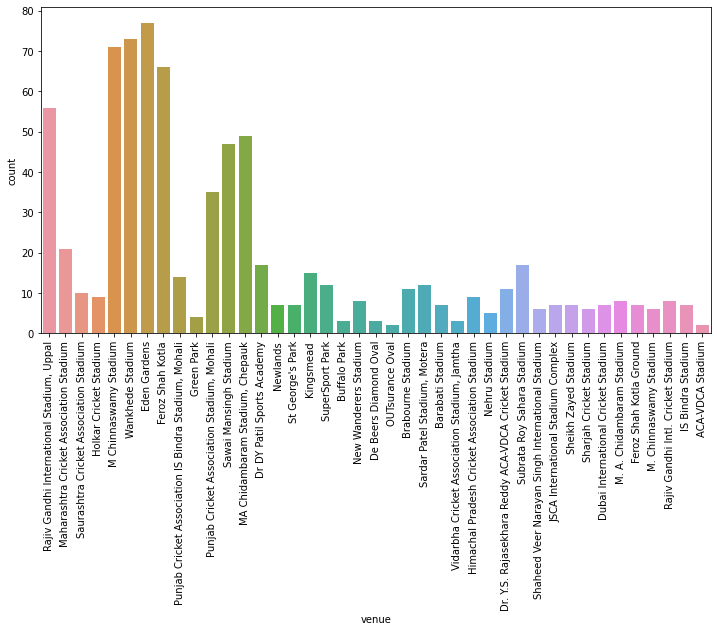

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_data)
plt.xticks(rotation='vertical')
plt.show()


* There are quite a few venues present in the data with `M Chinnaswamy Stadium` being the one with most number of matches followed by `Eden Gardens`.

### Number of matches played by each team

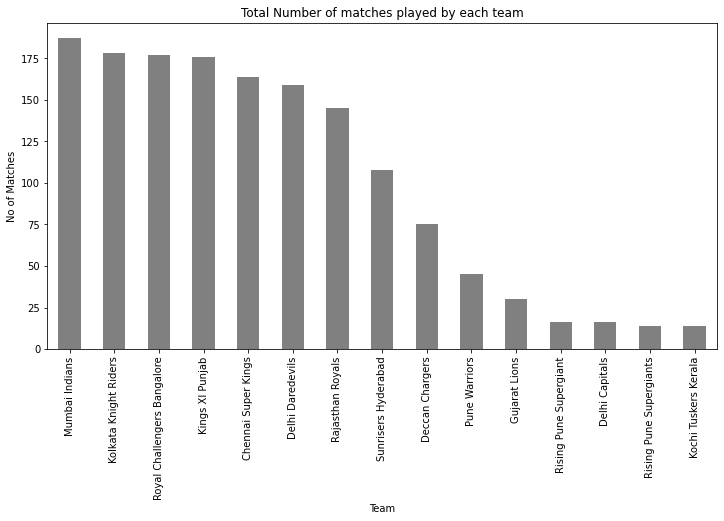

In [52]:
total_matches = pd.melt(match_data , id_vars=['season'] , value_vars=['team1' , 'team2'])["value"].value_counts()
total_matches.plot.bar(figsize=(12,6),title = 'Total Number of matches played by each team' , xlabel = 'Team' , ylabel = 'No of Matches' , color = 'grey')
plt.show()

In [54]:
len(match_data[match_data['toss_winner']==match_data['winner']])

393

In [55]:
len(match_data[match_data['toss_winner']!=match_data['winner']])

359

In [56]:
match_data[match_data['toss_decision']=='bat']['winner'].value_counts().sum()

292

In [57]:
match_data[match_data['toss_decision']=='field']['winner'].value_counts().sum()

460

### Toss decisions.

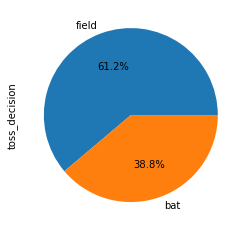

In [58]:
match_data['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

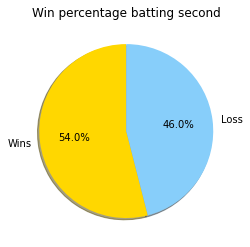

In [59]:
num_of_wins = (match_data.win_by_wickets>0).sum()
num_of_loss = (match_data.win_by_wickets==0).sum()
total = float(num_of_wins+num_of_loss)
label = ["Wins", "Loss"]
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=label, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()


In [60]:
match_data.head()

,season,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


### Top player of the match awardes winner

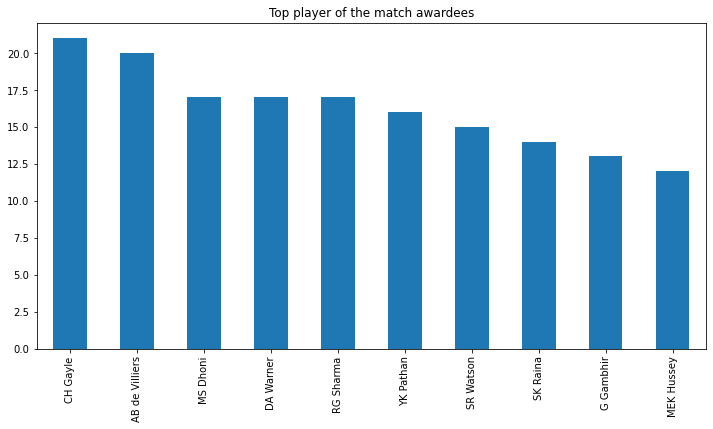

In [62]:
top_mom = match_data['player_of_match'].value_counts().head(10)
top_mom.plot.bar(title = "Top player of the match awardes" , figsize=(12,6))

* `CH Gayle` is the top player of the match awardee in all the seasons of **IPL.**

In [63]:
pd.options.display.max_columns = None
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [64]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [65]:
delivery_data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

###  Top run scorers in IPL.

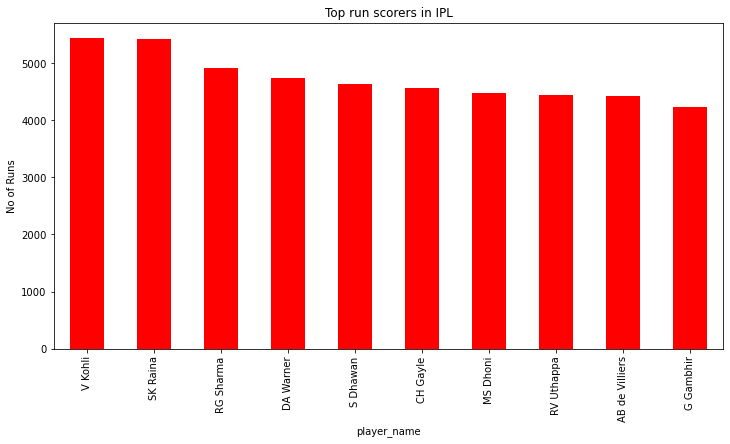

In [83]:
top_batsman_ipl = delivery_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)
top_batsman_ipl.plot.bar(figsize=(12,6),title = 'Top run scorers in IPL' , xlabel = 'player_name' , ylabel = 'No of Runs' , color = 'red')
plt.show()

* **Virat Kholi**  is leading at the chart followed closely by **Raina** and **Rohit.** Gayle is the top scorer among foreign players.

### Batsman with most number of fours

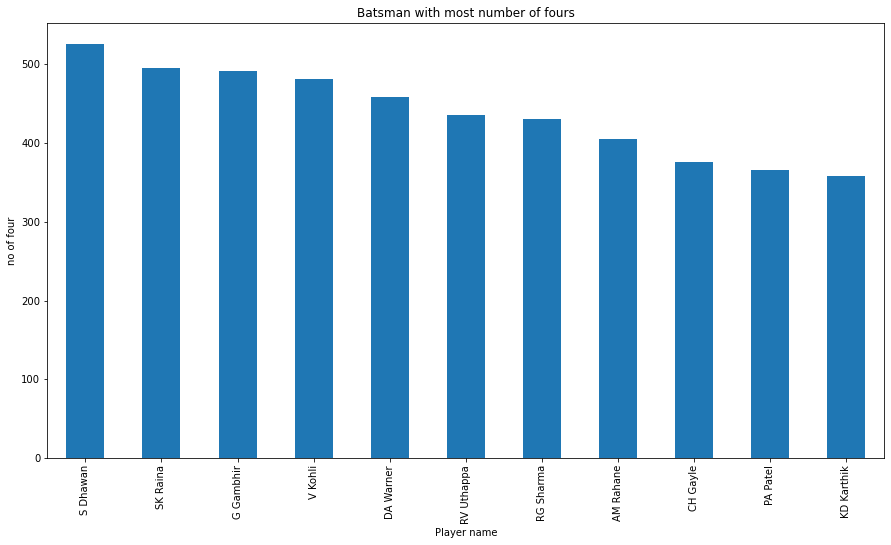

In [125]:
top_four_bat = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).head(11)
top_four_bat.plot.bar(x = 'batsman' , y = 'batsman_runs',figsize=(15,8) , title = 'Batsman with most number of fours' , legend = None , xlabel = 'Player name' , ylabel = 'no of four')

plt.show()

* **Shikar Dhawan** leading at the table with most numbers of fours.

### Batsman with most number of sixes.

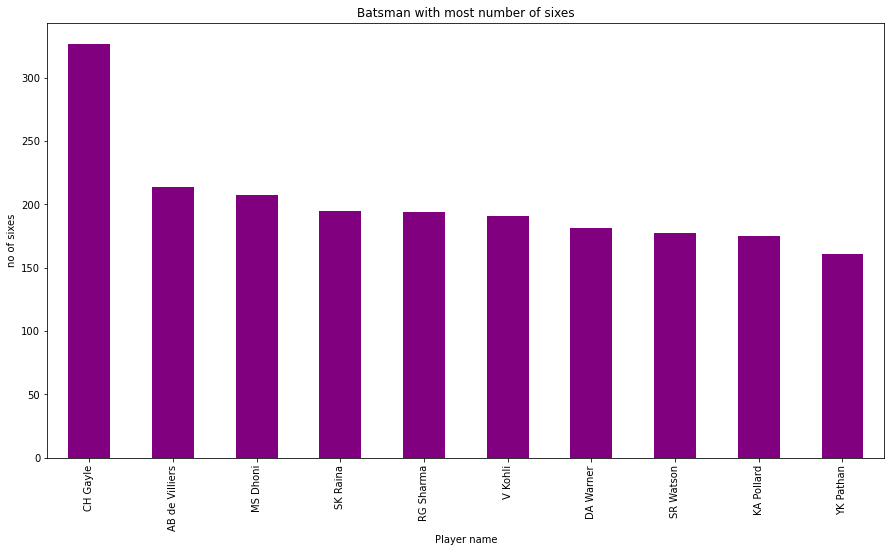

In [106]:
top_sixes_bat = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).head(10)
top_sixes_bat.plot.bar(x = 'batsman' , y = 'batsman_runs' , figsize=(15,8) , title = 'Batsman with most number of sixes' , legend = None , xlabel = 'Player name' , ylabel = 'no of sixes' , color = 'purple')

plt.show()

* obviously **CH Gayle** at the top almost about `327` sixes.

### Batsman with most number of dots

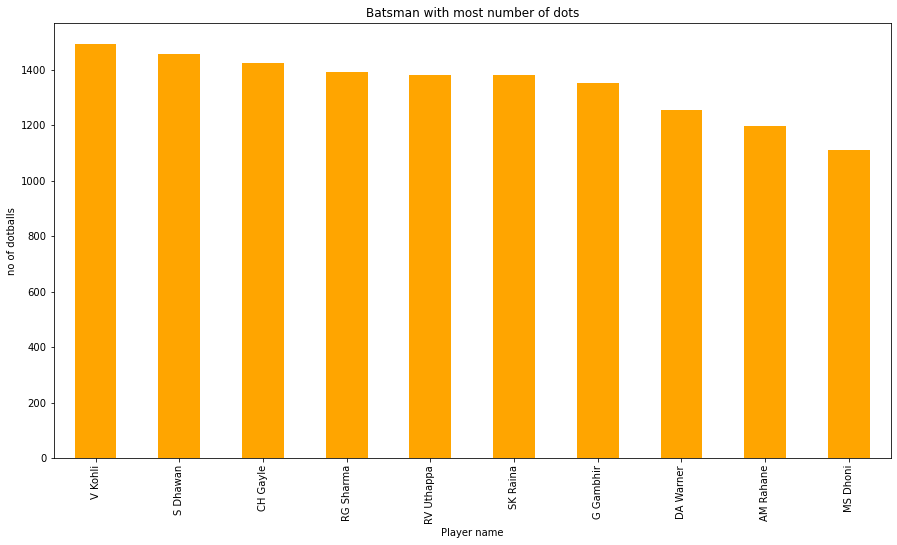

In [107]:
top_dot_bat = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).head(10)
top_dot_bat.plot.bar(x = 'batsman' , y = 'batsman_runs',figsize=(15,8) , title = 'Batsman with most number of dots' , legend = None , xlabel = 'Player name' , ylabel = 'no of dotballs' , color = 'orange')

plt.show()

* **Virat kholi** leading at the top with most no of `dotballs`. from my point of view virat kholi name is in the world top batsman.obviously when player faced most no of balls then they also have more dot ball as well.

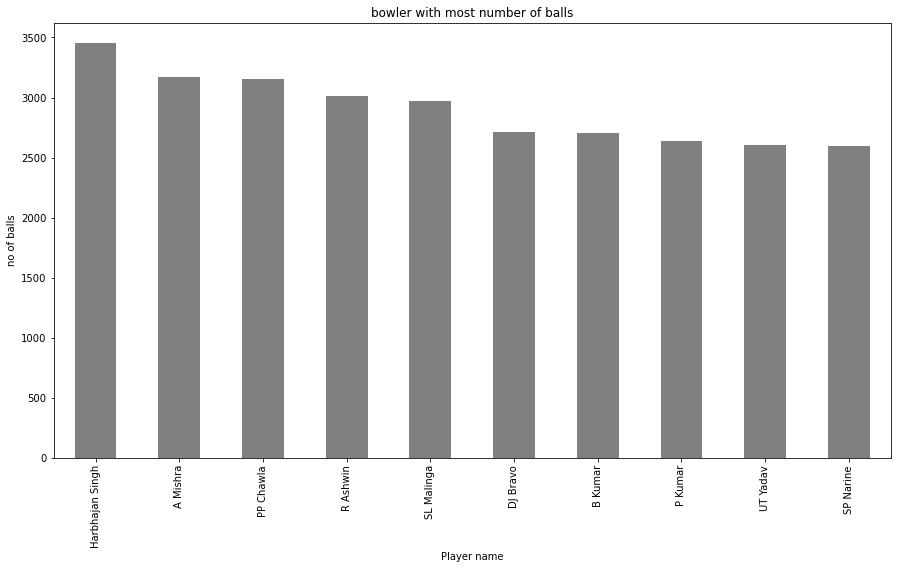

In [108]:
top_bowl_bal = delivery_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True).head(10)
top_bowl_bal.plot.bar(x = 'bowler' , y = 'ball' , figsize=(15,8) , title = 'bowler with most number of balls' , legend = None , xlabel = 'Player name' , ylabel = 'no of balls' , color = 'grey')

plt.show()

**Harbhajan Singh** is the the bowler with most number of balls bowled in `IPL matches`. Now let us see the bowler with more number of dot balls.

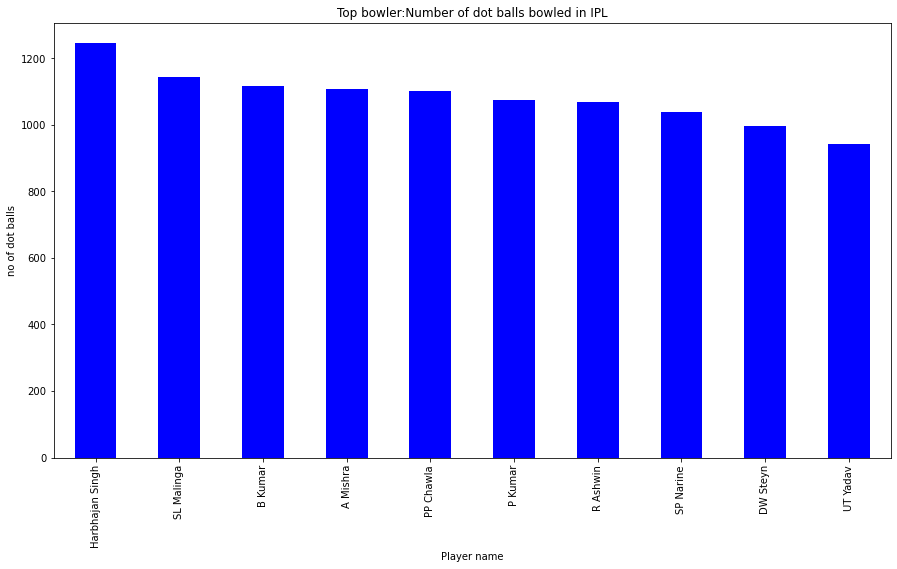

In [113]:
top_bowl = delivery_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True).head(10)
top_bowl.plot.bar(x = 'bowler' , y = 'total_runs' , figsize=(15,8) , title =  'Top bowler:Number of dot balls bowled in IPL' , legend = None , xlabel = 'Player name' , ylabel = 'no of dot balls' , color = 'blue')

plt.show()

**Harbhajan Singh** is the the bowler with most number of dotballs bowled in `IPL matches`.obviously Becasue he played the most matches then any other player. 

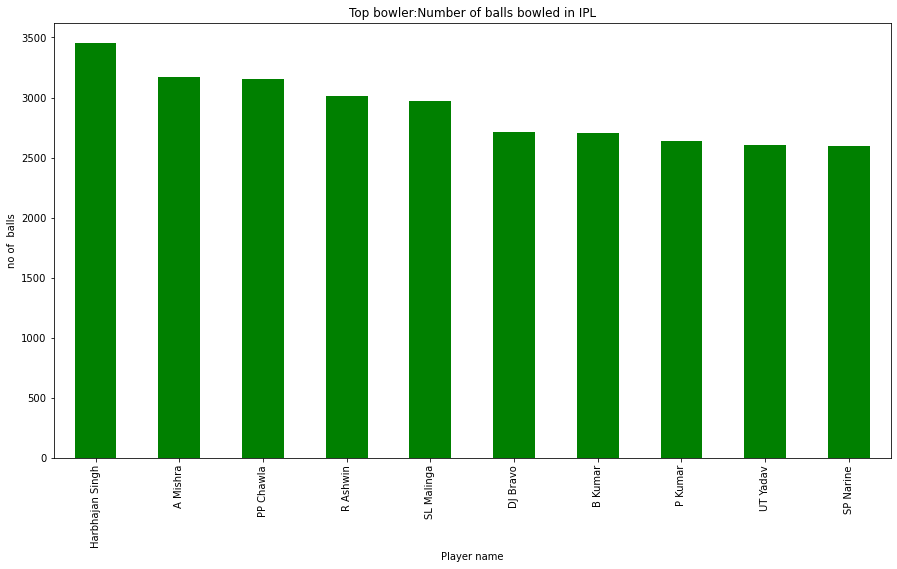

In [118]:
top_bowl_ball = delivery_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
top_bowl_bal.plot.bar(x = 'bowler' , y = 'ball' , figsize=(15,8) , title =  'Top bowler:Number of balls bowled in IPL' , legend = None , xlabel = 'Player name' , ylabel = 'no of  balls' , color = 'green')

plt.show()

`Pravin Kumar` is the one with more number of dot balls followed by `Steyn` and `Malinga`.

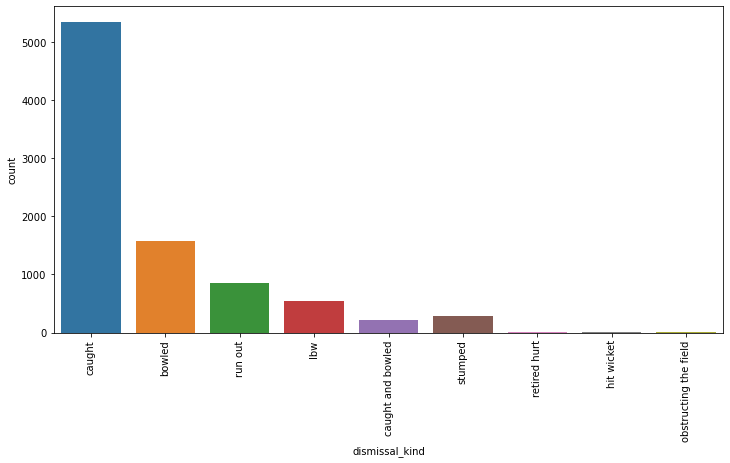

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=delivery_data)
plt.xticks(rotation='vertical')
plt.show()

`Caught` is the most common dismissal type in **IPL** followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!